In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train[0]

5

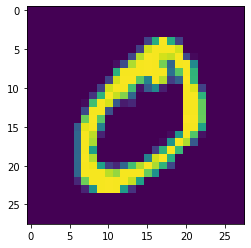

In [11]:
plt.imshow(X_train[1])

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [13]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

In [17]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2567 - accuracy: 0.9506 - val_loss: 0.0980 - val_accuracy: 0.9693
Epoch 2/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0695 - accuracy: 0.9791 - val_loss: 0.0983 - val_accuracy: 0.9735
Epoch 3/5
1875/1875 [==============================] - 196s 105ms/step - loss: 0.0494 - accuracy: 0.9842 - val_loss: 0.0906 - val_accuracy: 0.9755
Epoch 4/5
1875/1875 [==============================] - 192s 102ms/step - loss: 0.0375 - accuracy: 0.9882 - val_loss: 0.0913 - val_accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 196s 104ms/step - loss: 0.0306 - accuracy: 0.9903 - val_loss: 0.1032 - val_accuracy: 0.9743


In [18]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10322817414999008, 0.9743000268936157]


In [29]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 64ms/step
[[4.77358049e-11 1.26020884e-14 2.23637656e-07 2.59297366e-07
  1.53105145e-18 1.41474479e-13 2.73819453e-19 9.99999523e-01
  5.75746352e-12 1.40723442e-08]
 [3.92702641e-05 3.63764530e-09 9.99928832e-01 1.10518204e-06
  3.28396650e-11 1.87219923e-13 3.02575540e-06 4.75269130e-12
  2.79003762e-05 1.17118581e-09]
 [3.37602168e-11 9.99982953e-01 7.10459869e-09 3.63090309e-13
  1.67968246e-05 6.36366426e-09 4.59948364e-11 2.65287614e-09
  2.72516672e-07 1.53049936e-12]
 [9.99999762e-01 1.02759820e-17 6.89465485e-10 4.13503087e-14
  3.53135576e-12 2.56500203e-11 6.89072754e-09 4.50628203e-14
  8.74276596e-10 1.82247064e-07]]


In [22]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [23]:
model.save("model.h5")

In [24]:
model=load_model("model.h5")